# NumPy

![alt text](https://codelearnstorage.s3.amazonaws.com/Upload/Blog/thu-vien-numpy-trong-python-63724882299.0039.png)

`numpy` is one of the most essential libraries for Machine Learning and Deep Learning as it allows us to work with large, multi-dimensional arrays and matrices, and perform high-level mathematical functions on these arrays. 

# Set up

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [ ]:
#@title Helper functions {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Helper functions
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

def draw_vectors(vectors, origin='origin', cmap=None, labels=None):
    if cmap:
        colors = cmap
    else:
        colors = ['#3498db', '#e67e22', '#f1c40f', '#2ecc71', '#1abc9c']

    if origin == 'origin':
        x_0 = np.zeros(len(vectors))
        y_0 = np.zeros(len(vectors))
    else:
        x_0, y_0 = origin[:, 0], origin[:, 1]
    ax = plt.gca()
    if labels:
        for i in range(len(vectors)):
            ax.text(vectors[i][0]+0.1, vectors[i][1]+0.2, labels[i],
                    {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
                    'bbox': dict(boxstyle="round", fc="white", alpha=0)})
    ax.quiver(x_0, y_0, vectors[:, 0], vectors[:, 1],
              angles='xy', scale_units='xy', scale=1, color=colors)

def projection(x, y):
    color = '#95a5a6'
    ax = plt.gca()
    dot_product = np.dot(x, y)
    y_norm = y / np.dot(y, y)
    x_projection = y_norm * dot_product
    ax.plot((x[0], x_projection[0]), (x[1], x_projection[1]), linestyle='--', linewidth=3, c=color)
    draw_vectors(np.array([x_projection]), cmap=['#bdc3c7'])

def determinant_area(i_hat, j_hat):
    ax = plt.gca()
    sum_vector = i_hat + j_hat
    polygon = plt.Polygon([(0, 0), i_hat, sum_vector, j_hat], fill=True, color='#f39c12', alpha=0.3)
    print('Determinant Area:', np.abs(i_hat[0]*j_hat[1] - i_hat[1]*j_hat[0]))
    ax.add_line(polygon)

# Numpy is much faster than Python list

Users of Python are often drawn-in by its ease of use, one piece of which is dynamic typing.

```python
# Python code
x = 4
x = "four"
```

```c
/* C code */
int x = 4;
x = "four";  // FAILS
```

**A Python integer is more than just an integer**

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/cint_vs_pyint.png)

Notice the difference here: a C integer is essentially a label for a position in memory whose bytes encode an integer value. **A Python integer is a pointer to a position in memory containing all the Python object information, including the bytes that contain the integer value.** This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically. All this additional information in Python types comes at a cost, however, which becomes especially apparent in structures that combine many of these objects.

In [ ]:
x = 4
print(type(x))
print(hex(id(x)))

<class 'int'>
0x55db93fe2a60


In [ ]:
x = 'abcde'
print(type(x))
print(hex(id(x)))

<class 'str'>
0x7f16620465f0


**A Python list is more than just a list**

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png)

```python
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]
# [bool, str, float, int]
```

To allow these flexible types, each item in the list must contain its own type info and other information, each item is a complete Python object.

**Numpy stands for Numerical Python**

NumPy is, just like SciPy, Scikit-Learn, Pandas, etc. one of the packages that you just can’t miss when you’re learning data science, mainly because this library provides you with an array data structure that holds some benefits over Python lists, such as: being more compact, faster access in reading and writing items, being more convenient and more efficient.

NumPy is constrained to arrays that all contain the same type. If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

In [ ]:
a=[3.14,'a',True,1]
print(a)

[3.14, 'a', True, 1]


In [ ]:
tmp = np.array([3.14, 4, 2, 3])
print(tmp)
print(tmp.dtype)

[3.14 4.   2.   3.  ]
float64


In [ ]:
normal_list = [3.14, 4, 2, 3, 'a']
print(normal_list)

[3.14, 4, 2, 3, 'a']


In [ ]:
tmp = np.array([3.14, 4, 2, 3, 'a'])
print(tmp) # strings
print(tmp.dtype) # unicode

['3.14' '4' '2' '3' 'a']
<U32


In [ ]:
tmp = np.array([1, 4, 2, 3, 2])
tmp.dtype

dtype('int64')

In [ ]:
# if you want to explicitly set the data type
np.array([1, 2, 3, 4], dtype='float64')


array([1., 2., 3., 4.])

Let's do a quick speed comparison between numpy array and python list

In [ ]:
n=10**6
some_list = [0]*n

In [ ]:
len(some_list)

1000000

In [ ]:
%%time
for i in range(n):
    some_list[i]+=1

CPU times: user 132 ms, sys: 1.13 ms, total: 133 ms
Wall time: 134 ms


In [ ]:
def add_1(inp):
    return inp+1

In [ ]:
%%time
some_list = list(map(add_1,some_list))

CPU times: user 69.3 ms, sys: 16 ms, total: 85.3 ms
Wall time: 88.6 ms


In [ ]:
n

1000000

In [ ]:
np_arr = np.zeros(n)

In [ ]:
%%time
np_arr = np_arr+1

CPU times: user 2.79 ms, sys: 0 ns, total: 2.79 ms
Wall time: 1.86 ms


In [ ]:
np_arr[:100]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Basics

Let's take a took at how to create tensors with NumPy.

<div align="left">
<img src="https://i.imgur.com/VSCCjUx.png" width="650">
</div>


In [ ]:
# Scalar
x = np.array(6) # scalar
print ("x: ", x)

# Number of dimensions
print ("x ndim: ", x.ndim)

# Shape (number of elements at each dimension)
print ("x shape:", x.shape)

# Size of elements (how many numbers does x store)
print ("x size: ", x.size)

# Data type
print ("x dtype: ", x.dtype)

x:  6
x ndim:  0
x shape: ()
x size:  1
x dtype:  int64


## Vector

Vectors are elements of $R^n$ **(lists of n real number)**

$$
\vec{v} = \begin{pmatrix} v_1 \\ v_2 \\ \dots \\ v_n \end{pmatrix}
$$

Different notation to describe a vector of $R^n$
![](http://wiki.fast.ai/images/3/31/Vector_notation.png)

A vector represents the **magnitude** and **direction** of potential change to a point
![](http://wiki.fast.ai/images/1/1a/Vector_magnitude_direction.png)

In [ ]:
# Vector (1 dimensional array)
x = np.array([3,4])
print ("x: ", x)
print ("x ndim: ", x.ndim)
print ("x shape:", x.shape)
print ("x size: ", x.size)
print ("x dtype: ", x.dtype) # notice the float datatype

x:  [3 4]
x ndim:  1
x shape: (2,)
x size:  2
x dtype:  int64


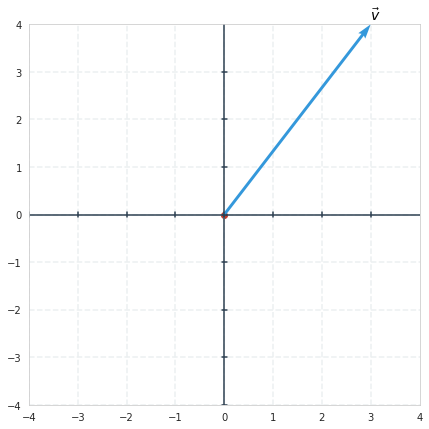

In [ ]:
#drawing the vector with origin 0
plt.figure(figsize=(7, 7))
draw_vectors(np.array([x]),labels=[r'$\vec{v}$'])
# draw_vectors(np.array([x]),origin=(-2,0),labels=[r'$\vec{v}$'])
draw_grid()

plt.show()


Length/magnitude of an array

Notation: Length of $\vec{v}$ = ||v||

In [ ]:
np.sqrt(x[0]**2 + x[1]**2)

5.0

In [ ]:
np.linalg.norm(x)

5.0

## Vector operations

### **Scalar multiplication**

Multiplication of a scalar and a vector

$$
a\vec{v} = a \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} =
\begin{pmatrix} av_1 \\ av_2 \end{pmatrix} 
$$

In [ ]:
v = np.array([1, 1])
a=3
av = a*v
av

array([3, 3])

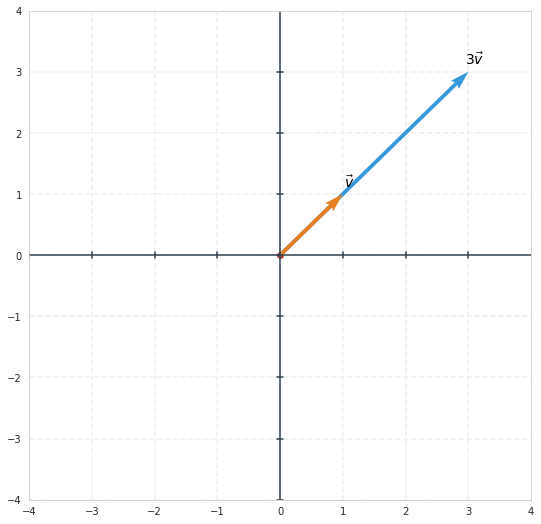

In [ ]:
plt.figure(figsize=(9, 9))
draw_grid()
draw_vectors(np.array([av,v]), labels=[r'$3\vec{v}$', r'$\vec{v}$'])
plt.show()

### **Addition**

$$
\vec{x} + \vec{y} = 
\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} 
+
\begin{pmatrix} y_1 \\ y_2 \end{pmatrix}
=
\begin{pmatrix} x_1 + y_1 \\ x_2 + y_2 \end{pmatrix}
$$

In [ ]:
x = np.array([1, 1])
y = np.array([-2, 2])
z = x  + -1 * y # z= x-y
z

array([ 3, -1])

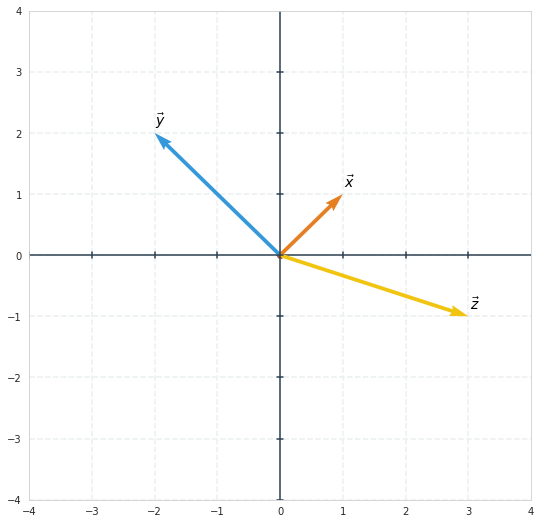

In [ ]:
plt.figure(figsize=(9, 9))
draw_grid()
draw_vectors(np.array([y, x, z]), labels=[r'$\vec{y}$', r'$\vec{x}$', r'$\vec{z}$'])
plt.show()
# Subtraction?

### Unit vectors

Unit vectors are vectors of length 1. They are useful when you care only about the direction of the change, and not the magnitude

the unit vector in the direction of $\vec{v}$:

$$
\hat{v} = \frac{\vec{v}}{||v||}
$$


$\hat{j}$=(0,1) and $\hat{i}$=(1,0) are **the basis vectors** of $R^2$ (xy coordinate system).

That means **you can represent any vector in $R^2$ using i and j**

$$
\vec{v} = \begin{pmatrix} v_1 \\ v_2 \end{pmatrix}
= v_1.\begin{pmatrix} 1 \\ 0 \end{pmatrix} + v_2.\begin{pmatrix} 0 \\ 1 \end{pmatrix}
= v_1.\hat{i} + v_2.\hat{j}
$$



In [ ]:
i = np.array([1, 0])
j = np.array([0, 1])
v = 3*i + 2*j
v

array([3, 2])

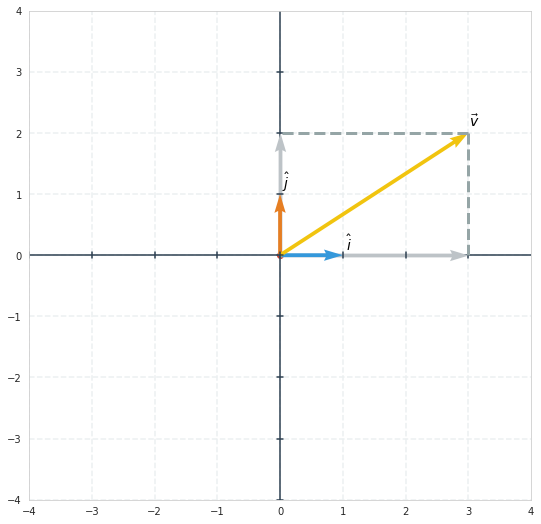

In [ ]:
plt.figure(figsize=(9, 9))
draw_grid()
projection(v, i)
projection(v, j)
draw_vectors(np.array([i, j, v]), labels=[r'$\hat{i}$', r'$\hat{j}$', r'$\vec{v}$'])

plt.show()

### Dot product (of two vectors)

A formal definition

$$
\vec{a}.\vec{b} = \sum_{i}^{n}{a_ib_i} = ||a||.||b||.cos\phi
$$

In [ ]:
a = np.array([1,2,3])
b = np.array([4,5,6])
dot_product = 1*4 + 2*5 + 3*6
dot_product

32

Dot product of $\vec{a}$ and $\vec{b}$ is 
- **is positive** when they point at 'similar' directions. Bigger = more similar
- **equals 0** when they are perpendicular.
- **is negative** when they are at dissimilar directions. Smaller (more negative) = more dissimilar

In [ ]:
def norm(v):
    return np.linalg.norm(v)
# def cosine_sim(a,b):
#     return np.dot(a,b)/(norm(a)*norm(b))
def visualize_similarity(a,b):
    print(f'Dot product: {np.dot(a,b)}')
    # print(f'Cosine similarity: {cosine_sim(a,b)}')
    plt.figure(figsize=(6,6))
    draw_grid()
    draw_vectors(np.array([a, b]), labels=[r'$\vec{a}$', r'$\vec{b}$'])
    plt.show()

In [ ]:
a = np.array([3, 3])

Dot product: 24


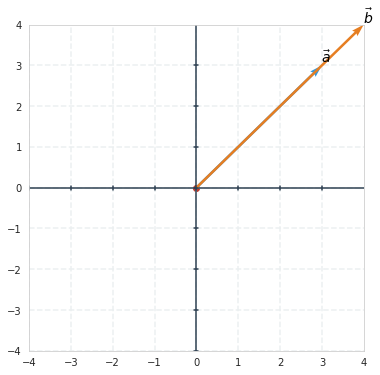

In [ ]:
b = np.array([4, 4])
visualize_similarity(a,b)

Dot product: 0


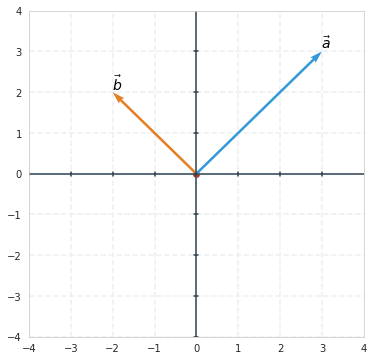

In [ ]:
a = np.array([3, 3])
b = np.array([-2, 2])
visualize_similarity(a,b)

Dot product: -12


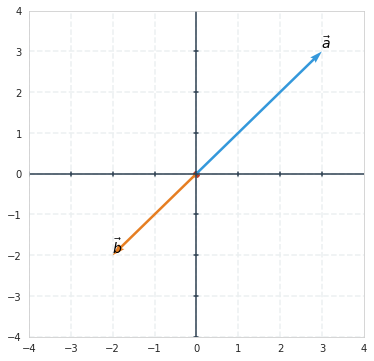

In [ ]:
b = np.array([-2, -2])
visualize_similarity(a,b)

Dot product: 9


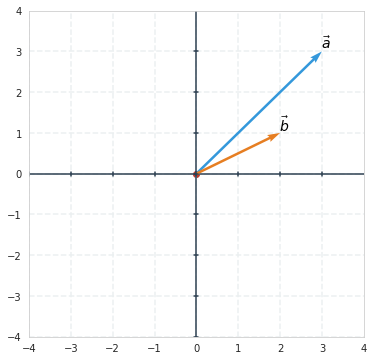

In [ ]:
b = np.array([2, 1])
visualize_similarity(a,b)

### Hadamard product (Element-wise multiplication)

In [ ]:
a = np.array([1,2,3,4,5,6])
b = np.array([2,3,4,4,5,6])
element_wise = a*b
element_wise

array([ 2,  6, 12, 16, 25, 36])

In [ ]:
np.dot(a,b) # dot product

97

## Matrix

A matrix is a two-dimensional rectangular array of numbers

In [ ]:
# Matrix (2 dimensional array)
x = np.array([ [1,2] , [3,4] ])
print ("x:\n", x)
print ("x ndim: ", x.ndim)
print ("x shape:", x.shape)
print ("x size: ", x.size)
print ("x dtype: ", x.dtype)

x:
 [[1 2]
 [3 4]]
x ndim:  2
x shape: (2, 2)
x size:  4
x dtype:  int64


### Dimension of a matrix

For a matrix with **m rows and n columns**, we describe the dimensions of a matrix as **m by n** (m x n), and it belongs to $R^{mxn}$

In [ ]:
a= np.array([
    [1,2,3], 
    [4,5,6]
])
a.shape

(2, 3)

In [ ]:
a= np.array([
    [1,2,3], 
])
a.shape

(1, 3)

In [ ]:
a= np.array([1,2,3]) # vector
a.shape

(3,)

### Matrix multiplication

One of the most common NumPy operations we’ll use in machine learning is matrix multiplication using the dot product. We take the rows of our first matrix (2) and the columns of our second matrix (2) to determine the dot product, giving us an output of `[2 X 2]`. 

Not all matrices are eligible for multiplication. In addition, there is a requirement on the dimensions of the matrix product. Source.

1. The number of columns in the first matrix must equal the number of rows in the second
2. **The product of an M x N matrix and an N x K matrix is an M x K matrix**. The new matrix takes the rows of the first and columns of the second.

<div align="left">
<img src="https://raw.githubusercontent.com/GokuMohandas/madewithml/main/images/basics/numpy/dot.gif" width="450">
</div>

For matrix multiplication, using '@' is prefered than np.dot

https://numpy.org/doc/stable/reference/generated/numpy.dot.html

In [ ]:

a = np.array([[1,2,3], [4,5,6]], dtype=np.float64) # we can specify dtype
b = np.array([[7,8], [9,10], [11, 12]], dtype=np.float64)
c = a @ b 
# c = np.dot(a, b)
print (f"Shape: {a.shape} · {b.shape} = {c.shape}")
print (c)

Shape: (2, 3) · (3, 2) = (2, 2)
[[ 58.  64.]
 [139. 154.]]


In [ ]:
b@a

array([[ 39.,  54.,  69.],
       [ 49.,  68.,  87.],
       [ 59.,  82., 105.]])

## 3 Dimensional Tensor

In [ ]:
# 3-D Tensor
# x = np.array([ [ [1,2],[3,4],[5,6] ] , [ [5,6],[7,8],[8,9] ]])
# or 
x = np.array([
              [[1,2],
               [3,4]],
              [[5,6],
               [7,8]]
              ])

print ("x:\n", x)
print ("x ndim: ", x.ndim)
print ("x shape:", x.shape)
print ("x size: ", x.size)
print ("x dtype: ", x.dtype)

x:
 [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
x ndim:  3
x shape: (2, 2, 2)
x size:  8
x dtype:  int64


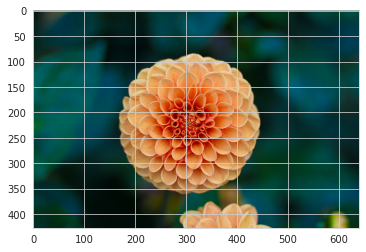

In [ ]:
from sklearn.datasets import load_sample_image

img = load_sample_image('flower.jpg')

plt.imshow(img)

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
img.ndim

3

In [ ]:
img.shape

(427, 640, 3)

## Numpy useful function for initialization

NumPy also comes with several functions that allow us to create tensors quickly.

In [ ]:
# Functions
print ("a 2x3 matrix full of zeros:\n", np.zeros(shape=(2,3)))
print ("a 2x5 matrix full of ones:\n", np.ones(shape=(2,5)))
print ("a 4x4 identity matrix:\n", np.eye((4))) # identity matrix 
print ("a 3x4 matrix full of random numbers between 0 and 1:\n", np.random.random((3,4)))

a 2x3 matrix full of zeros:
 [[0. 0. 0.]
 [0. 0. 0.]]
a 2x5 matrix full of ones:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
a 4x4 identity matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
a 3x4 matrix full of random numbers between 0 and 1:
 [[0.04659861 0.55022178 0.68317751 0.44419385]
 [0.17295291 0.39965108 0.42008366 0.82276935]
 [0.64994814 0.35836358 0.40086951 0.09393903]]


# Indexing

Keep in mind that when indexing the row and column, indices start at 0. And like indexing with lists, we can use negative indices as well (where -1 is the last item).

<div align="left">
<img src="https://i.imgur.com/y0CL0S4.png" width="300">
</div>

In [ ]:
# Indexing
x = np.array([1, 2, 3])
print ("x: ", x)
print ("x[0]: ", x[0])

x:  [1 2 3]
x[0]:  1


In [ ]:
x

array([1, 2, 3])

In [ ]:
x[0:2] = 0

In [ ]:
x

array([0, 0, 3])

In [ ]:
x[0] = 0
x

array([0, 2, 3])

In [ ]:
x[-1]

3

In [ ]:
x[0:2]

array([0, 2])

In [ ]:
# Slicing
x = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) 
print (x)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [ ]:
print ("x 3rd column: ", x[:, 2]) 

x 3rd column:  [ 3  7 11]


In [ ]:
print ("x 2nd row: ", x[1, :]) 

x 2nd row:  [5 6 7 8]


In [ ]:
print ("x last row: \n", x[-1, :]) 

x last row: 
 [ 9 10 11 12]


In [ ]:
tmp = x[1, :]
tmp.shape

(4,)

In [ ]:
# Slicing
x = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) 
print(x)
tmp = x[0:2,1:3]
print("x rows 0,1 & cols 1,2: \n", tmp) 


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
x rows 0,1 & cols 1,2: 
 [[2 3]
 [6 7]]


In [ ]:
tmp.shape

(5,)

In [ ]:
x[[0,2],:]

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [ ]:
# question: how can I get the first and the last COLUMN out?
x[:,[0,-1]]

array([[ 1,  4],
       [ 5,  8],
       [ 9, 12]])

In [ ]:
# Integer array indexing
x = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) 
print(x)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [ ]:
# Combine sequences above to get values to get
print ("indexed values: ", x[[0,1,2], [0,2,1]]) # (0, 0), (1, 2), (2, 1)

indexed values:  [ 1  7 10]


In [ ]:
# Boolean array indexing
x = np.array([[1, 3], [2, 4], [5, 6]])
print(x.shape)
print ("x:\n", x)
print ("x > 2:\n", x > 2)
print ("x[x > 2]:\n", x[x > 2])  

(3, 2)
x:
 [[1 3]
 [2 4]
 [5 6]]
x > 2:
 [[False  True]
 [False  True]
 [ True  True]]
x[x > 2]:
 [3 4 5 6]


In [ ]:
x= np.random.random((2,3,3))
print(x)
print(x.shape)

[[[0.12621247 0.83162233 0.08108532]
  [0.15484731 0.86526688 0.65167172]
  [0.05431797 0.97654091 0.55493388]]

 [[0.4069012  0.4999181  0.23686416]
  [0.19585055 0.44756169 0.54619417]
  [0.16875341 0.858985   0.04944885]]]
(2, 3, 3)


In [ ]:
x[0,:,:]

array([[0.12621247, 0.83162233, 0.08108532],
       [0.15484731, 0.86526688, 0.65167172],
       [0.05431797, 0.97654091, 0.55493388]])

In [ ]:
x[1,:,:]

array([[0.4069012 , 0.4999181 , 0.23686416],
       [0.19585055, 0.44756169, 0.54619417],
       [0.16875341, 0.858985  , 0.04944885]])

In [ ]:
# Question: how can I get the second row of the second matrix?
x[1,1,:]

array([0.19585055, 0.44756169, 0.54619417])

In [ ]:
# Question: how can I get the last column of the first matrix?
x[0,:,-1]

array([0.08108532, 0.65167172, 0.55493388])

# Transposing

We often need to change the dimensions of our matrix for operations like matrix multiplication

To transpose a matrix there are two steps:
1. Rotate the matrix 90°
2. Reverse the order of elements in each row (e.g. [a b ] becomes [b a])


<div align="left">
<img src="https://raw.githubusercontent.com/GokuMohandas/madewithml/main/images/basics/numpy/transpose.png" width="400">
</div>

In [ ]:
x = np.array([[1,2,3], [4,5,6]])
print ("x:\n", x)
print ("x.shape: ", x.shape)
x_transpose= x.T
print ("X transpose:\n", x_transpose)
print ("X.T shape: ", x_transpose.shape)


x:
 [[1 2 3]
 [4 5 6]]
x.shape:  (2, 3)
X transpose:
 [[1 4]
 [2 5]
 [3 6]]
X.T shape:  (3, 2)


In [ ]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
np.transpose(x, (0,1))

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
# another way of using np transpose
x_transpose = np.transpose(x, (1,0)) # flip dimensions at index 0 and 1
print ("X transpose:\n", x_transpose)
print ("X transpose shape: ", x_transpose.shape)


X transpose:
 [[1 4]
 [2 5]
 [3 6]]
X transpose shape:  (3, 2)


# Reshaping

Sometimes, we'll need to alter the dimensions of the matrix. **Reshaping allows us to transform a tensor into different permissible shapes** -- our reshaped tensor has the same amount of values in the tensor. (1X6 = 2X3).**We can also use `-1` on a dimension and NumPy will infer the dimension based on our input tensor.**

The way reshape works is by looking at each dimension of the new tensor and separating our original tensor into that many units. So here the dimension at index 0 of the new tensor is 2 so we divide our original tensor into 2 units, and each of those has 3 values.

<div align="left">
<img src="https://raw.githubusercontent.com/GokuMohandas/madewithml/main/images/basics/numpy/reshape.png" width="450">
</div>

In [ ]:
# Reshaping
x = np.array([1,2,3,4,5,6])
print (x)
print ("x.shape: ", x.shape)

[1 2 3 4 5 6]
x.shape:  (6,)


In [ ]:
y = np.reshape(x, (2, 3))
print ("y: \n", y)
print ("y.shape: ", y.shape)

y: 
 [[1 2 3]
 [4 5 6]]
y.shape:  (2, 3)


In [ ]:
z = np.reshape(x, (2, -1))
print ("z: \n", z)
print ("z.shape: ", z.shape)

z: 
 [[1 2 3]
 [4 5 6]]
z.shape:  (2, 3)


In [ ]:
z = np.reshape(x, (3, -1))
print ("z: \n", z)
print ("z.shape: ", z.shape)

z: 
 [[1 2]
 [3 4]
 [5 6]]
z.shape:  (3, 2)


In [ ]:
z = np.reshape(x, (3, 1,-1))
z.shape

(3, 1, 2)

In [ ]:
# np.reshape(x, (3, 3))

# Adding/removing dimensions

We can also easily add and remove dimensions to our tensors and we'll want to do this to make tensors compatible for certain operations.

In [ ]:
# Adding dimensions
x = np.array([1,2,3])
print ("x:\n", x)
print ("x.shape: ", x.shape)
y = np.expand_dims(x, axis=[0,2]) # expand dim 1
print ("y: \n", y)
print ("y.shape: ", y.shape)   # notice extra set of brackets are added

x:
 [1 2 3]
x.shape:  (3,)
y: 
 [[[1]
  [2]
  [3]]]
y.shape:  (1, 3, 1)


In [ ]:
# Removing dimensions
x = np.array([[[1,2,3]],[[4,5,6]]])
print ("x:\n", x)
print ("x.shape: ", x.shape)
y = np.squeeze(x, axis=1) # squeeze dim 1
print ("y: \n", y)
print ("y.shape: ", y.shape)  # notice extra set of brackets are gone

x:
 [[[1 2 3]]

 [[4 5 6]]]
x.shape:  (2, 1, 3)
y: 
 [[1 2 3]
 [4 5 6]]
y.shape:  (2, 3)


In [ ]:
# Adding dimensions
x = np.array([1,2,3])
y = np.expand_dims(x, axis=[0,2]) # expand dim 1
print ("y: \n", y)
print ("y.shape: ", y.shape)   # notice extra set of brackets are added

y: 
 [[[1]
  [2]
  [3]]]
y.shape:  (1, 3, 1)


In [ ]:
z = np.squeeze(y)

In [ ]:
print(z)
print(z.shape)

[1 2 3]
(3,)


# Arithmetic


In [ ]:
# Basic math
x = np.array([[1,1], [2,2]], dtype=np.float64)
y = np.array([[2,2], [3,3]], dtype=np.float64)
print(x)
print('-'*10)
print(y)
print('-'*10)

print ("x + y:\n", np.add(x, y)) # or x + y
print('-'*10)

print ("x - y:\n", np.subtract(x, y)) # or x - y
print('-'*10)

print ("x * y:\n", np.multiply(x, y)) # or x * y (different from x.dot(y))

[[1. 1.]
 [2. 2.]]
----------
[[2. 2.]
 [3. 3.]]
----------
x + y:
 [[3. 3.]
 [5. 5.]]
----------
x - y:
 [[-1. -1.]
 [-1. -1.]]
----------
x * y:
 [[2. 2.]
 [6. 6.]]


### Axis operations

We can also do operations across a specific axis.

<div align="left">
<img src="https://raw.githubusercontent.com/GokuMohandas/madewithml/main/images/basics/numpy/axis.gif" width="450">
</div>

In [ ]:
# Sum across a dimension
x = np.array([[1,2,3],[3,4,5]])
print (x)
print ("sum all: ", np.sum(x)) # adds all elements
print ("sum axis=0: ", np.sum(x, axis=0)) # sum across rows
print ("sum axis=1: ", np.sum(x, axis=1)) # sum across columns

[[1 2 3]
 [3 4 5]]
sum all:  18
sum axis=0:  [4 6 8]
sum axis=1:  [ 6 12]


In [ ]:
x.shape

(2, 3)

In [ ]:
tmp = np.sum(x,axis=1)
tmp

array([ 6, 12])

In [ ]:
tmp.shape

(2,)

In [ ]:
tmp = np.sum(x,axis=1,keepdims=True)
tmp.shape

(2, 1)

In [ ]:
tmp

array([[ 6],
       [15]])

In [ ]:
# Sum across a dimension
x = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4]])
print (x)
print (x.shape)
print ("sum all: ", np.sum(x)) # adds all elements

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
(3, 4)
sum all:  30


In [ ]:
# question: what is the output of this, and what is the shape of tmp?
tmp = np.sum(x, axis=0)
print("sum axis=0: ", tmp) # sum across rows
print(tmp.shape)


sum axis=0:  [ 3  6  9 12]
(4,)


In [ ]:
# question: what is the output of this, and what is the shape of tmp?
tmp = np.sum(x, axis=1)
print("sum axis=0: ", tmp) # sum across rows
print(tmp.shape)

sum axis=0:  [10 10 10]
(3,)


In [ ]:
# Min/max
x = np.array(
              [[1,2,3], 
               [44,45,0]]   
              )
print(x)
print(x.shape)
print ("min: ", x.min())
print ("max: ", x.max())
print ("min axis=0: ", x.min(axis=0))
print ("min axis=1: ", x.min(axis=1))

[[ 1  2  3]
 [44 45  0]]
(2, 3)
min:  0
max:  45
min axis=0:  [1 2 0]
min axis=1:  [1 0]


In [ ]:
tmp=np.array([2,3,0,1])
np.argmin(tmp)

2

In [ ]:
x = np.array(
              [[1,2,3], 
               [44,45,0]]   
              )
print(x)

[[ 1  2  3]
 [44 45  0]]


In [ ]:
np.argmin(x)

5

In [ ]:
# Get the index of each min element across axis
np.argmin(x,axis=0)

array([0, 0, 1])

In [ ]:
# Get the index of each min element across axis
np.argmin(x,axis=1)

array([0, 2])

# Broadcasting

What is broadcasting

- the matrix of the smaller shape is expanded to match the matrix of the bigger shape
- Only when shapes are **compatible** when trying to do an elementwise operation

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

When operating on two arrays, NumPy compares their shapes element-wise. It **starts with the trailing (most right) dimensions and works its way to the left**. Two dimensions are compatible when
- they are equal, or
- one of them is 1

If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

**Matrix and scalar**

Normalize **entire** your dataset by subtracting **the mean (a scalar)** from the entire data set (a matrix) and dividing by the **standard deviation (another scalar)**

In [14]:
m = np.arange(12).reshape(3,4)
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [15]:
m.shape

(3, 4)

In [17]:
mean = np.mean(m)
std = np.std(m)
print(mean) 
print(std) # these are scalars

5.5
3.452052529534663


In [18]:
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [19]:
m - mean

array([[-5.5, -4.5, -3.5, -2.5],
       [-1.5, -0.5,  0.5,  1.5],
       [ 2.5,  3.5,  4.5,  5.5]])

|Name|Type|Shape|Transform|
|--|--|--|--|
|A|2d array|3x4|
|B|1d array|1| => 1x1 => 3x4
|Result|2d array|3x4|

In [20]:
(m-mean)/std

array([[-1.59325501, -1.30357228, -1.01388955, -0.72420682],
       [-0.43452409, -0.14484136,  0.14484136,  0.43452409],
       [ 0.72420682,  1.01388955,  1.30357228,  1.59325501]])

**Matrix and vector**

Normalize each column (each column will have its own mean and std)

In [2]:
m = np.arange(12).reshape(3,4)
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [3]:
mean = np.mean(m,axis=0)
std = np.std(m,axis=0)
mean

array([4., 5., 6., 7.])

In [29]:
mean.shape

(4,)

In [31]:
m-mean

array([[-4., -4., -4., -4.],
       [ 0.,  0.,  0.,  0.],
       [ 4.,  4.,  4.,  4.]])

In [ ]:
std

array([3.26598632, 3.26598632, 3.26598632, 3.26598632])

In [ ]:
mean.shape

(4,)

|Name|Type|Shape|Transform|
|--|--|--|--|
|A|2d array|3x4|
|B|1d array|4| => 1x4 => 3x4
|Result|2d array|3x4|

In [32]:
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
(m - mean) / std

array([[-1.22474487, -1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487,  1.22474487]])

Will this work?

In [1]:
import numpy as np

In [4]:
print(mean)
print(mean.shape)

[4. 5. 6. 7.]
(4,)


In [10]:
mean.shape

(4,)

In [5]:
# adding a new axis using np.newaxis
print(mean[:,np.newaxis])
print(mean[:,np.newaxis].shape)
new_mean = mean[:,np.newaxis]

[[4.]
 [5.]
 [6.]
 [7.]]
(4, 1)


In [6]:
new_mean.shape

(4, 1)

In [7]:
m.shape

(3, 4)

In [8]:
(m - new_mean)

ValueError: ignored

|Name|Type|Shape|Transform|
|--|--|--|--|
|A|2d array|3x4|
|B|2d array|4x1| 
|Result|2d array|?|

How about this

In [14]:
m = np.ones((4,3))
a = np.arange(1,7).reshape(2,3)
print(m)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1 2 3]
 [4 5 6]]


In [15]:
print(m.shape)
print(a.shape)

(4, 3)
(2, 3)


# Question

Check whether these matrices can be broadcasted, using the broadcasting rule

- A matrix of shape (2,3) + a vector of shape (3,)
- A matrix of shape (2,3) + a vector of shape (2,)
- A matrix of shape (3,2) + a matrix of shape (3,)
- A matrix of shape (2,3) + a 3d tensor of shape (4,2,3)
- A matrix of shape (3,2) + a 3d tensor of shape (4,2,3)
- A matrix of shape (4,3) + a 3d tensor of shape (4,2,3)
- A matrix of shape (224,224,3) + a vector of shape (3,)
- A matrix of shape (3,224,224) + a vector of shape (3,)

For any of these pair that cannot be broadcasted right away, find a way to make it work by adding new axis/transposing/reshaping ONE of the array. Please show your work below



In [17]:
a = np.random.randint(10,size=(2,3))
b = np.random.randint(10,size=(2,))
print(a.shape,b.shape)

b = b.reshape((-1,1)) # turn (2,) into (2,1)
# b = b[:,np.newaxis]
# b = np.expand_dims(b,axis=1)
print(b.shape)
c = a+b
c

(2, 3) (2,)
(2, 1)


array([[14,  7, 11],
       [11, 11, 12]])

# Additional resources

* If you want to learn more checkout the [NumPy reference manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/).
* [Standford CS213n - Python Numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy)
* [TutorialsPoint - A comprehensive guide to Python Numpy](https://www.tutorialspoint.com/numpy/index.htm)
* [Datacamp - Numpy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* Another useful tutorial: https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d